# This notebook is an example of display of RDI ADCP data

## import libraries

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np

from pyproj import Geod
g = Geod(ellps='WGS84')

import sys
if not '.' in sys.path:
    sys.path.append(".")

import util_adcp

## Select RDI ADCP file (STA: Short Time Averaged)

In [2]:
file_name = "./ADCP_DriX__20220922T202647_018_000000.STA"

# READING

In [3]:
# STA file reading
STA=util_adcp.read_WH300(file_name)
# navigation compensation
STA=util_adcp.ADCPcompNav(STA)              

# DISPLAY

## Figures display parameters

In [4]:
%matplotlib notebook
#plt.rcParams['figure.figsize']=[15, 4.8]
#plt.rcParams['figure.dpi'] = 100
#plt.rcParams['image.aspect']='auto'

## Display current velocity magnitude

<IPython.core.display.Javascript object>


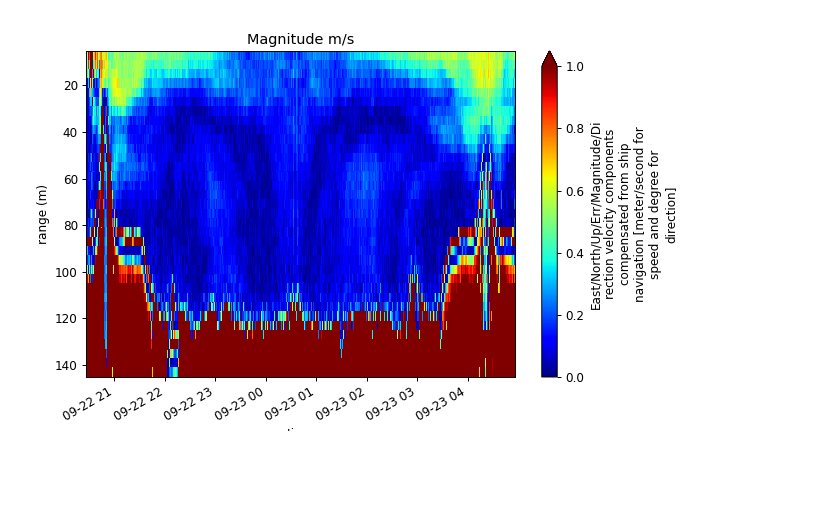

In [5]:
plt.figure(figsize=[8, 5])
p=STA["vel comp Nav"].sel(dir='Mag').plot(vmin=0,vmax=1,cmap='jet')
p.axes.invert_yaxis()
plt.title('Magnitude m/s');
plt.ylabel('range (m)');

## Display current velocity direction

<IPython.core.display.Javascript object>


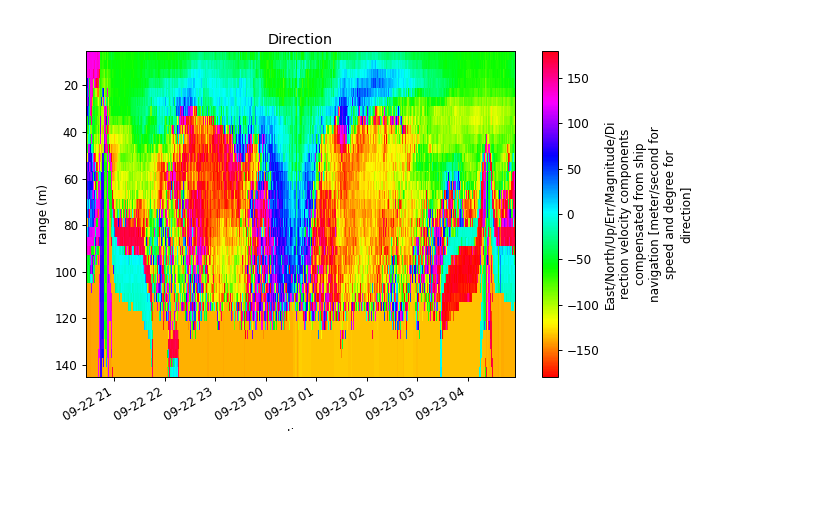

In [9]:
plt.figure(figsize=[8, 5])
p=STA["vel comp Nav"].sel(dir='Dir').plot(cmap='hsv')
p.axes.invert_yaxis()
plt.title('Direction');
plt.ylabel('range (m)');

## Current Arrow display

### Set parameters for current arrows display

In [7]:
depth_arrows_m=10 #m (range of ADCP layer chosen for plotting current arrows)
duration_arrows_s=60*30 #scale parameter for current arrows (1: distance in meters covered by current in 1 second)

### display 

<IPython.core.display.Javascript object>


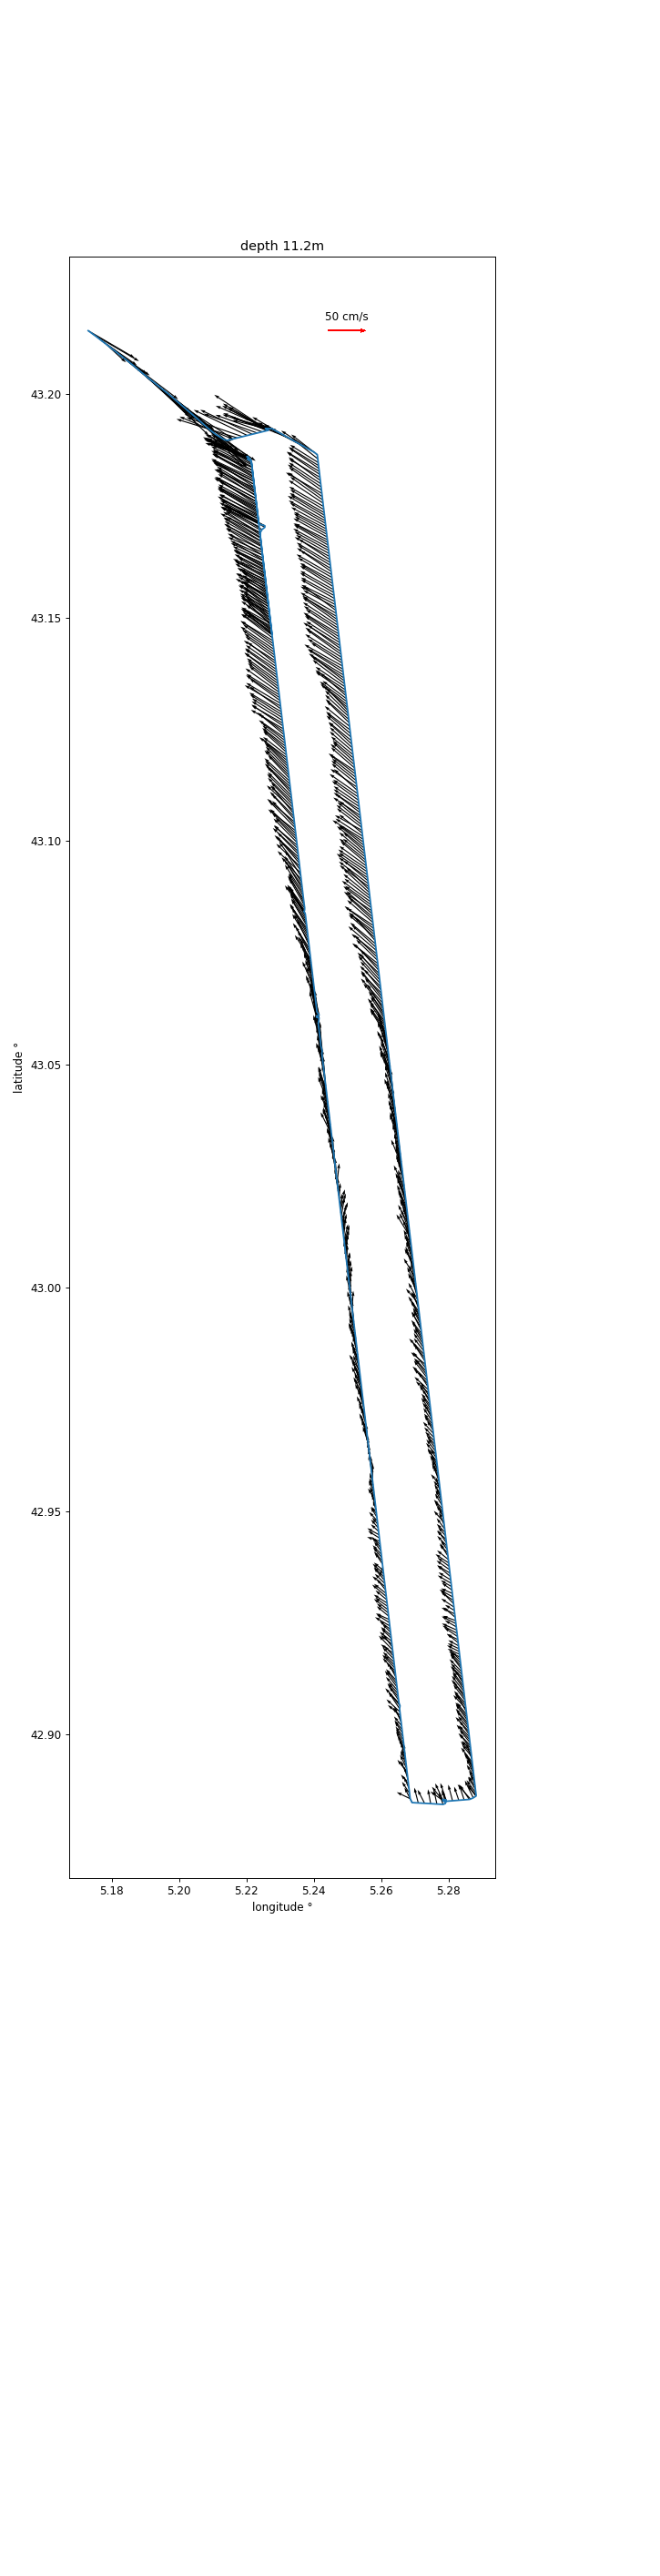

In [8]:
ibin=np.argmin(np.abs(STA.range.data-depth_arrows_m))

# ADCP lat/long and lat/long for arrows extremity
long=STA["elongitude_gps"].data
lat=STA["elatitude_gps"].data
az=STA["vel comp Nav"].sel(dir='Dir').data[ibin,:]
dist=STA["vel comp Nav"].sel(dir='Mag').data[ibin,:]*duration_arrows_s
[long2,lat2,n]=g.fwd(long,lat,az,dist)
dlat=lat2-lat
dlong=long2-long

# figure size for 1:1 x:y display
a,b,delta_x=g.inv(min(long),np.mean(lat),max(long),np.mean(lat))
a,b,delta_y=g.inv(np.mean(long),min(lat),np.mean(long),max(lat))
xsize=7
ysize=xsize/delta_x*delta_y
# arrow length for scale display (50cm/s)
[Dlong_50cm_s,a,b]=g.fwd(np.mean(long),np.mean(lat),90,0.5*duration_arrows_s)
Dlong_50cm_s=Dlong_50cm_s-np.mean(long)

plt.figure(figsize=[xsize, ysize])
plt.plot(long,lat)
p=plt.quiver(long,lat,dlong,dlat,scale=1,scale_units='xy',angles='xy')
plt.xlabel('longitude °');plt.ylabel('latitude °');plt.title('depth ' + str(STA.range.data[ibin]) + 'm');
plt.quiverkey(p,np.mean(long),max(lat),Dlong_50cm_s,'50 cm/s',color='red',coordinates='data')